# code by code

In [ ]:
import torch
from torch import nn # building blocks for neural networks
import matplotlib.pyplot as plt
import seaborn as sns

print(torch.__version__)

2.5.1+cu121


In [ ]:
what_were_covering = {1:"data (prepare and load)",
                      2 : "build model",
                      3 : "fitting the model",
                      4: "making predictions and evaluating model (inference)",
                      5: "saving the model",
                      6: "putting all together"}

### 1. Data (preparing and loading)

In [ ]:
# Linear regression


# Known parameters

weight = 0.2
bias = 0.8

# create

start = 0
end = 1
step = 0.02

X = torch.arange(start, end, step).unsqueeze(dim=1)

y = weight * X + bias

X[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.8000],
         [0.8040],
         [0.8080],
         [0.8120],
         [0.8160],
         [0.8200],
         [0.8240],
         [0.8280],
         [0.8320],
         [0.8360]]))

In [ ]:
len(X), len(y)

(50, 50)

#### Train test split

In [ ]:
index80 = int(len(X) * 0.80 )

In [ ]:
x_train = X[ : index80]
x_test = X[index80:]
y_train = y[: index80]
y_test = y[index80: ]

len(x_train), len(y_train),len(x_test),len( y_test)

(40, 40, 10, 10)

In [9]:
def plot_predictions(train_data, train_labels, test_data, test_labels, predictions=None):

  """
  Plots training data, test dat and compare predicitons
  """

  plt.scatter(train_data, train_labels, c="b", s =4, label="Train")
  plt.scatter(test_data, test_labels, c="g", s = 4, label = "Test")

  if predictions is not None:

    plt.scatter(test_data, predictions, c="r", s=8, label="predictions")

  plt.legend(prop={"size":14})


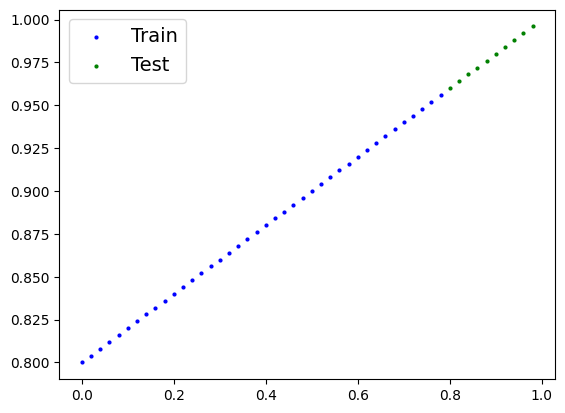

In [ ]:
plot_predictions(x_train, y_train, x_test, y_test)

### 2.Build the model

In [ ]:
# Create linear regression model

class LinearRegressionModel(nn.Module):

  def __init__(self):

    super().__init__()
    self.weight = nn.Parameter(torch.randn( 1, requires_grad = True, dtype = torch.float))
    self.bias = nn.Parameter(torch.randn( 1, requires_grad = True, dtype = torch.float))

  def forward(self, x: torch.Tensor)-> torch.Tensor:

    return self.weight * x + self.bias

In [ ]:
### Pytorch model building essentials

"""
* torch.nn - all modules needed for computational graphs
* torch.nn.Parameter - parameters should be optimised to fit the dataset (fit the model)
* torch.nn.Module -  Base class for all neural network models, if subclass it need to overwrite the forward method
* torch.optim - optimizers which helps to optimize the parameter with gradient descent
* def forward() - all nn.Module subclasses should overwrite this method

"""



'\n* torch.nn - all modules needed for computational graphs\n* torch.nn.Parameter - parameters should be optimised to fit the dataset (fit the model)\n* torch.nn.Module -  Base class for all neural network models, if subclass it need to overwrite the forward method\n* torch.optim - optimizers which helps to optimize the parameter with gradient descent\n* def forward() - all nn.Module subclasses should overwrite this method\n\n'

In [ ]:
### checking the contents the pytorch model

torch.manual_seed(42)
model_0 = LinearRegressionModel()

## getting the parameters

print(f"parameters: {list(model_0.parameters())}")


## current state

print(f"parameter: {model_0.state_dict()}")


parameters: [Parameter containing:
tensor([0.3367], requires_grad=True), Parameter containing:
tensor([0.1288], requires_grad=True)]
parameter: OrderedDict([('weight', tensor([0.3367])), ('bias', tensor([0.1288]))])


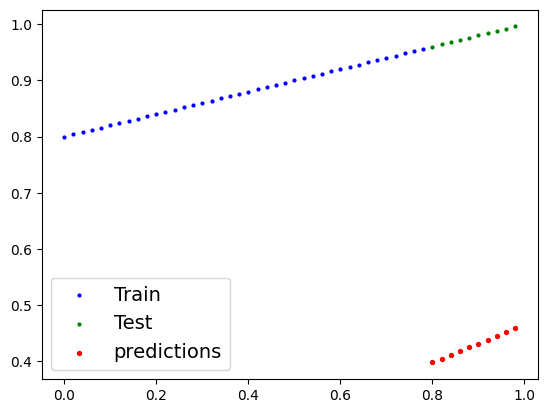

In [ ]:
# make prediction

with torch.inference_mode():
  y_preds = model_0(x_test)


# plotting current inference

plot_predictions(x_train, y_train, x_test, y_test, y_preds)

### 3. Train model

In [ ]:
# Loss function -  cost function / criterion



#### 3.1 loss function and optimizer

In [ ]:
## setup loss function

loss_fn = nn.L1Loss()

## setup the optimizer -  stochastic radiant descent

optimizer = torch.optim.SGD(params = model_0.parameters(), lr = 0.01) # lr- learning rate hyper parameter


#### 3.2 building training  and testing loop


In [ ]:
### Building training loop

"""
0. loop through the data
1. Forward pass (data moving through model's forward function) - forward propagation
2. calculate the loss (forward pass predictions vs gorund truth labels)
3. optimizer zero grad
4. Loss backward (back propagation)- gradients of the each parameters with respect to the loss
5. optimizer step - changes the models parameter to decrease the loss
"""

"\n0. loop through the data\n1. Forward pass (data moving through model's forward function) - forward propagation\n2. calculate the loss (forward pass predictions vs gorund truth labels)\n3. optimizer zero grad\n4. Loss backward (back propagation)- gradients of the each parameters with respect to the loss\n5. optimizer step - changes the models parameter to decrease the loss\n"

In [ ]:
# epochs- number of loop through the data
epochs = 400

epoch_count = []
loss_values = []
test_loss_values = []
### Training loop

# 0. Loop through the data

for epoch in range(epochs):

  # Set the model to training mode

  model_0.train()

  # 1. Forward pass

  y_pred = model_0(x_train)

  # 2. Calcualting Loss

  loss = loss_fn(y_pred, y_train)


  # 3. Optimizer zero grad

  optimizer.zero_grad()

  # 4. Back propagation

  loss.backward()

  # 5. Step the optimizer

  optimizer.step()


  ### testing loop

  # setting the model for testing mode

  model_0.eval() # turn off some unwanted layers for testing

  with torch.inference_mode():  # turns off gradient tracking of parameters

    # 1. Forward pass

    test_pred = model_0(x_test)

    # 2. loss

    test_loss = loss_fn(test_pred, y_test)

    if epoch % 10 ==0:

      epoch_count.append(epoch+1)
      loss_values.append(loss.item())
      test_loss_values.append(test_loss.item())
      print(f"Epoch: {epoch+1}| Loss: {loss} | test_loss: {test_loss}")
      print(model_0.state_dict())



Epoch: 1| Loss: 0.6178814172744751 | test_loss: 0.5360651612281799
OrderedDict([('weight', tensor([0.3406])), ('bias', tensor([0.1388]))])
Epoch: 11| Loss: 0.5026713609695435 | test_loss: 0.40135520696640015
OrderedDict([('weight', tensor([0.3796])), ('bias', tensor([0.2388]))])
Epoch: 21| Loss: 0.38746142387390137 | test_loss: 0.2666453719139099
OrderedDict([('weight', tensor([0.4186])), ('bias', tensor([0.3388]))])
Epoch: 31| Loss: 0.27225157618522644 | test_loss: 0.13193552196025848
OrderedDict([('weight', tensor([0.4576])), ('bias', tensor([0.4388]))])
Epoch: 41| Loss: 0.15704165399074554 | test_loss: 0.014829474501311779
OrderedDict([('weight', tensor([0.4966])), ('bias', tensor([0.5388]))])
Epoch: 51| Loss: 0.07998768985271454 | test_loss: 0.1006731167435646
OrderedDict([('weight', tensor([0.5195])), ('bias', tensor([0.6163]))])
Epoch: 61| Loss: 0.06659741699695587 | test_loss: 0.13009698688983917
OrderedDict([('weight', tensor([0.5149])), ('bias', tensor([0.6498]))])
Epoch: 71| 

In [ ]:
with torch.inference_mode():
  y_pred = model_0(x_test)

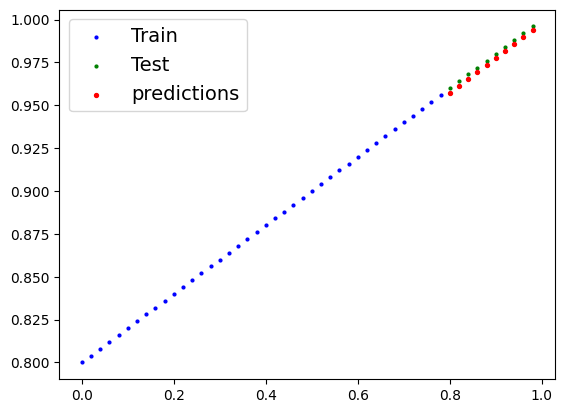

In [ ]:
plot_predictions(x_train, y_train, x_test, y_test, y_pred)

### loss visualisation

In [8]:
def plot_losses(epoch_count, loss_values, test_loss_values):
  plt.plot(epoch_count, loss_values, c="g", label="Training loss")
  plt.plot(epoch_count, test_loss_values, c="r", label="Test loss")
  plt.xlabel("Number of epochs")
  plt.ylabel("Loss")
  plt.title("Train and test losses of the model_0")
  plt.legend()

### Saving model

In [ ]:
# three ways of saving and loading

## Method 1 : torch.save()

## Method 2 : torch.load()

## Method 3 : torch.nn.Module.load_state_dict()

In [ ]:
# Method 1 : torhc.save()

## model state_dict()

print(model_0.state_dict())

print(optimizer.state_dict())


from pathlib import Path

# creating model dir

MODEL_PATH  = Path("models")

MODEL_PATH.mkdir(parents = True, exist_ok =True)


# creating model name

MODEL_NAME = "01_pytorch_model_lr.pth"
OPTIM_NAME = "01_pytorch_optimizer_lr.pth"

MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME
OPTIM_SAVE_PATH = MODEL_PATH / OPTIM_NAME
torch.save(obj = model_0.state_dict(), f = MODEL_SAVE_PATH)
torch.save(obj = optimizer.state_dict(), f = OPTIM_SAVE_PATH)

OrderedDict([('weight', tensor([0.2044])), ('bias', tensor([0.7938]))])
{'state': {}, 'param_groups': [{'lr': 0.01, 'momentum': 0, 'dampening': 0, 'weight_decay': 0, 'nesterov': False, 'maximize': False, 'foreach': None, 'differentiable': False, 'fused': None, 'params': [0, 1]}]}


In [ ]:
# Loading the model

## Initialising the model

model = LinearRegressionModel()

## Intialising the optimizer

optimizer = torch.optim.SGD(params = model.parameters()) # Other hyper parameter will be upated

## Loading model state dict to model

model.load_state_dict(torch.load(f = "/content/models/01_pytorch_model_lr.pth", weights_only=True))

## Loading optimizer state dict to optimizer

optimizer.load_state_dict(torch.load("/content/models/01_pytorch_optimizer_lr.pth", weights_only = True))


# Crucial step to drop unwanted layers for evaluation purposes
model.eval()

LinearRegressionModel()

In [ ]:
model.state_dict()

OrderedDict([('weight', tensor([0.2044])), ('bias', tensor([0.7938]))])

In [ ]:
optimizer.state_dict()

{'state': {},
 'param_groups': [{'lr': 0.01,
   'momentum': 0,
   'dampening': 0,
   'weight_decay': 0,
   'nesterov': False,
   'maximize': False,
   'foreach': None,
   'differentiable': False,
   'fused': None,
   'params': [0, 1]}]}

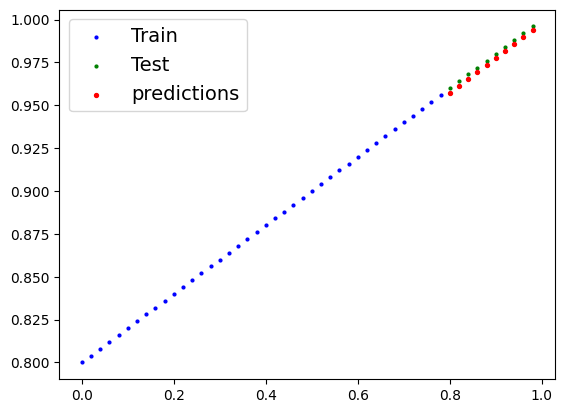

In [ ]:
## Inference

with torch.inference_mode():

  y_pred = model(x_test)

plot_predictions(x_train, y_train, x_test, y_test, y_pred)

# everything together

In [1]:
import torch
from torch import nn
import matplotlib.pyplot as plt
import numpy as np

### helper functions

In [2]:
predictions ={}
def plot_predictions(train_data, train_labels, test_data, test_labels, predictions=None):

  """
  Plots training data, test dat and compare predicitons
  """

  plt.scatter(train_data, train_labels, c="b", s =4, label="Train")
  plt.scatter(test_data, test_labels, c="g", s = 4, label = "Test")

  if predictions is not None:

    for key, value in predictions.items():
      plt.scatter(test_data, value, s=8, label=key)

  plt.legend(prop={"size":14})



def plot_losses(epoch_count, loss_values, test_loss_values):
  """
  Plots the training loss and testing loss agianst epochs
  """
  plt.plot(epoch_count, loss_values, c="g", label="Training loss")
  plt.plot(epoch_count, test_loss_values, c="r", label="Test loss")
  plt.xlabel("Number of epochs")
  plt.ylabel("Loss")
  plt.title("Train and test losses of the model_0")
  plt.legend()

## Data preparation

In [3]:
# Creating dummy data

X = torch.arange(0,1, 0.01)

# Initializing the weight and bias

weight = 0.7

bias = 0.3

# Linear regression

y = weight * X + bias

In [4]:
# Train test split

index = int(len(X) * 0.8)

# train and test (80% and 20 %)

x_train, y_train = X[ : index ] , y[ : index ]

x_test, y_test = X[ index : ], y[ index : ]

In [5]:
# Creating the model

class LinearRegressionMod(nn.Module):

  def __init__(self):
    super().__init__()
    self.weight = nn.Parameter(torch.rand(1, requires_grad= True, dtype = torch.float))
    self.bias = nn.Parameter(torch.rand(1, requires_grad = True, dtype = torch.float))

  def forward(self, x):
    """
    every subclass of nn.Module must implement forward
    """
    return self.weight * x + self.bias

In [6]:
# Initialising the model, loss function, optimizer

torch.manual_seed(64)

## Model

model = LinearRegressionMod()

## Loss function

loss_fn = nn.L1Loss()

## optimizer

optimizer = torch.optim.SGD(params = model.parameters(), lr = 0.01)

In [7]:
# Training loop

epoch_count = []
loss_values = []
test_loss_values = []

def trainer(epochs, optimizer, model, loss_fn = loss_fn, x_train = x_train, y_train = y_train, x_test = x_test, y_test = y_test):

  # total epoch calculation

  if len(epoch_count) != 0:
    start = epoch_count[-1]+1
    end = start + epochs
  else:
    start = 1
    end = epochs+1

  for epoch in range(start, end):

    # 0. Training mode
    model.train()

    # 1. forward pass
    y_pred = model(x_train)

    # 2. Calculate loss
    loss = loss_fn(y_pred, y_train)

    # 3. Optimizer reset
    optimizer.zero_grad()

    # 4. loss backwards
    loss.backward()

    # 5. optimizer step
    optimizer.step()

    # 0. Evaluation mode
    model.eval()

    # 1. Inference mode
    with torch.inference_mode():
      y_pred = model(x_test)

    # 2. Calculate test loss
    test_loss = loss_fn(y_pred, y_test)

    # 3. logging the progress
    if epoch % 10 == 0:
      epoch_count.append(epoch)
      loss_values.append(loss.item())
      test_loss_values.append(test_loss.item())

  return [model, optimizer, epoch_count, loss_values, test_loss_values]




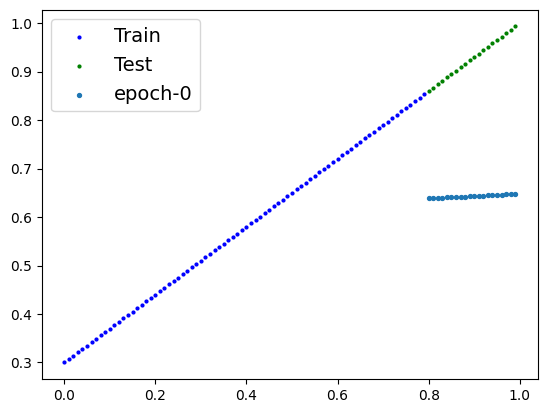

In [8]:
model.eval()

with torch.inference_mode():
  y_pred = model(x_test)
  predictions["epoch-0"] = y_pred

# Performance of the initial model

plot_predictions(x_train, y_train, x_test, y_test, predictions)


In [9]:
# training for 100 epoches

[model, optimizer, epoch_count, loss_values, test_loss_values] = trainer(epochs = 100, optimizer = optimizer, model= model)

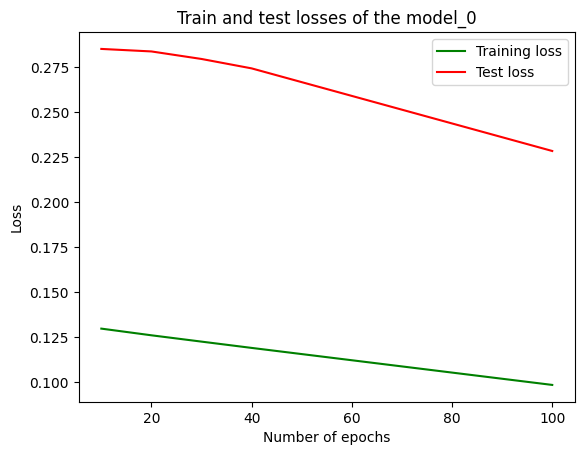

In [10]:
# loss visualization

plot_losses(epoch_count, loss_values, test_loss_values)

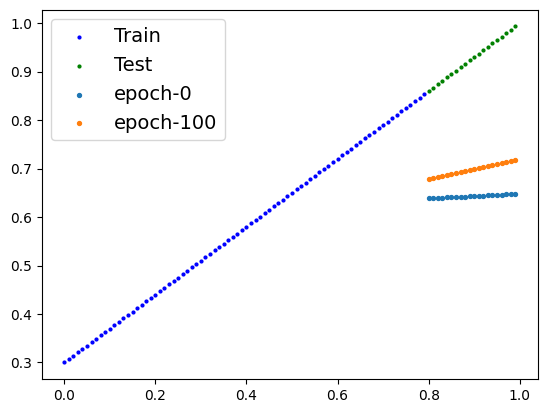

In [11]:
# Prediciton after 100 epochs

model.eval()

with torch.inference_mode():
  y_pred = model(x_test)
  predictions["epoch-100"] = y_pred


plot_predictions(x_train, y_train, x_test, y_test, predictions)


### saving the model

In [12]:
# Saving the model for future training


from pathlib import Path

MODEL_PATH = Path("pretrained")

MODEL_PATH.mkdir(exist_ok = True, parents = True)

# model name

MODEL_NAME = "pretrained_100_model.pth"

MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# optimizer

OPTIM_NAME = "optimizer.pth"

OPTIM_SAVE_PATH = MODEL_PATH / OPTIM_NAME

# Saving the model and optimizer

torch.save(obj = model.state_dict(), f = MODEL_SAVE_PATH)

torch.save(obj = optimizer.state_dict(), f = OPTIM_SAVE_PATH)


### loading model

In [13]:
# loading the model

model = LinearRegressionMod()

# loading the state dict

model.load_state_dict(torch.load(f = "/content/pretrained/pretrained_100_model.pth", weights_only = True))

# model in eval

model.eval()
# Optimizer Initialisation

optimizer = torch.optim.SGD(params = model.parameters())

# updating the optimizer's state dict

optimizer.load_state_dict(torch.load(f = "/content/pretrained/optimizer.pth", weights_only= True))

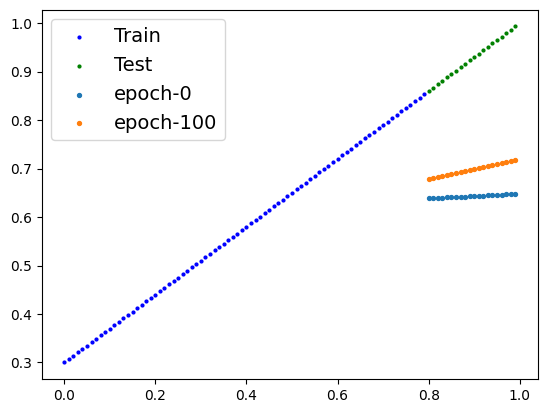

In [15]:
# Testint the pretriained model

model.eval()

with torch.inference_mode():
  y_pred = model(x_test)



plot_predictions(x_train, y_train, x_test, y_test, predictions)

In [16]:
# training the saved model

epochs = 200

[model, optimizer, epoch_count, loss_values, test_loss_values] = trainer(epochs, optimizer = optimizer, model = model)

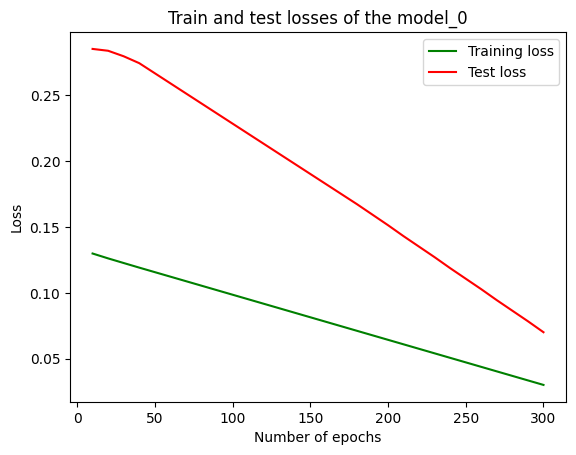

In [17]:
plot_losses(epoch_count, loss_values=loss_values, test_loss_values = test_loss_values)

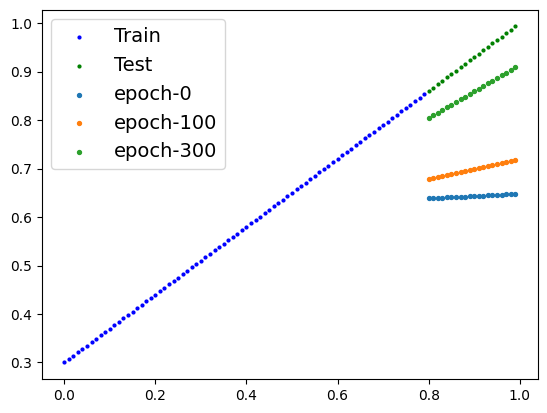

In [18]:
# after the 300 epochs

model.eval()

with torch.inference_mode():
  y_pred = model(x_test)
  predictions["epoch-300"] = y_pred


plot_predictions(x_train, y_train, x_test, y_test, predictions)

In [19]:
# doing another 200 epochs

epochs = 200

[ model, optimizer, epoch_count, loss_values, test_loss_values] = trainer(epochs=epochs, optimizer = optimizer, model = model)

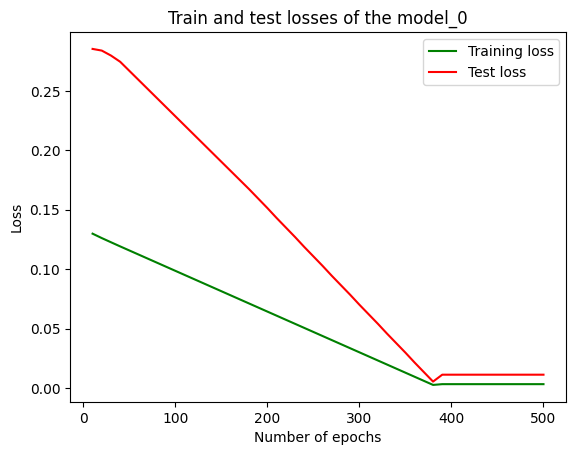

In [20]:
plot_losses(epoch_count, loss_values, test_loss_values)

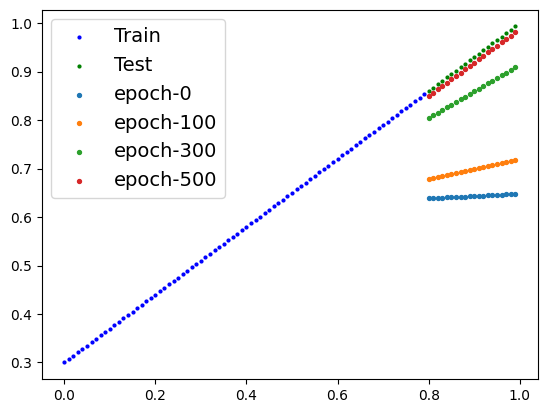

In [21]:
# Inference after 500 epochs

model.eval()

with torch.inference_mode():
  y_pred = model(x_test)
  predictions["epoch-500"] = y_pred



plot_predictions(x_train, y_train, x_test, y_test, predictions)